##Instalando bibliotecas



In [1]:
 !pip install 'fsspec>=0.3.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 5.7 MB/s 


##Importando bibliotecas e arquivos do drive


In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/dataframes/olist_geoleocated_time_prediction.csv')

In [5]:
df = df.compute()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112660 entries, 0 to 112659
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112660 non-null  int64  
 1   order_item_id                  112660 non-null  float64
 2   product_id                     112660 non-null  int64  
 3   seller_id                      112660 non-null  int64  
 4   shipping_limit_date            112660 non-null  object 
 5   price                          112660 non-null  float64
 6   freight_value                  112660 non-null  float64
 7   payment_sequential             112660 non-null  float64
 8   payment_type                   112660 non-null  int64  
 9   payment_installments           112660 non-null  float64
 10  payment_value                  112660 non-null  float64
 11  review_id                      112660 non-null  int64  
 12  review_score                  

In [7]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,costumer_lat,costumer_lng,seller_lat,seller_lng,days_to_delivery,early_delivery
0,0,1.0,8216,812,2017-09-19 09:45:35,58.9,13.29,1.0,1,2.0,...,650.0,28.0,9.0,14.0,-21.763186,-41.310265,-22.497188,-44.127324,6.0,10
1,7014,1.0,8216,812,2017-07-05 02:44:11,55.9,17.96,1.0,0,1.0,...,650.0,28.0,9.0,14.0,-17.884803,-51.717167,-22.497188,-44.127324,6.0,21
2,30559,1.0,8216,812,2018-05-23 10:56:25,64.9,18.33,1.0,1,2.0,...,650.0,28.0,9.0,14.0,-19.913964,-43.976106,-22.497188,-44.127324,5.0,15
3,40954,1.0,8216,812,2017-08-07 18:55:08,58.9,16.17,1.0,1,3.0,...,650.0,28.0,9.0,14.0,-25.520334,-49.124988,-22.497188,-44.127324,1.0,23
4,45875,1.0,8216,812,2017-08-16 22:05:11,58.9,13.29,1.0,1,4.0,...,650.0,28.0,9.0,14.0,-20.655379,-43.776331,-22.497188,-44.127324,1.0,21
5,58794,1.0,8216,812,2017-08-03 15:23:46,55.9,26.93,1.0,1,1.0,...,650.0,28.0,9.0,14.0,-12.906138,-39.192076,-22.497188,-44.127324,5.0,22
6,69027,1.0,8216,812,2018-03-26 03:28:44,64.9,38.50,1.0,0,1.0,...,650.0,28.0,9.0,14.0,-15.036469,-41.260324,-22.497188,-44.127324,0.0,23
7,74190,2.0,8216,812,2017-08-14 04:25:34,58.9,18.12,1.0,0,1.0,...,650.0,28.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324,2.0,27
8,74190,1.0,8359,812,2017-08-14 04:25:34,58.9,17.83,1.0,0,1.0,...,530.0,30.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324,2.0,27
9,82148,1.0,8216,812,2017-06-09 14:31:21,55.9,35.71,2.0,3,1.0,...,650.0,28.0,9.0,14.0,-7.957598,-34.874754,-22.497188,-44.127324,2.0,29


In [8]:
#transformando em datas pelo pandas
for col in df[['review_creation_date','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','shipping_limit_date','review_answer_timestamp','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']]:
    df[col] = pd.to_datetime(df[col])

##Separando datas em novas colunas



In [9]:
#separando dia
def day_shipping(data):
    return data['shipping_limit_date'].day

df["day_shipping"] = df.apply(day_shipping, axis = 1)

#separando mes
def month_shipping(data):
    return data['shipping_limit_date'].month

df["month_shipping"] = df.apply(month_shipping, axis = 1)

#separando ano
def year_shipping(data):
    return data['shipping_limit_date'].year

df["year_shipping"] = df.apply(year_shipping, axis = 1)

In [10]:
#separando dia
def day_review_creation(data):
    return data['review_creation_date'].day

df["day_review_creation"] = df.apply(day_review_creation, axis = 1)

#separando mes
def month_review_creation(data):
    return data['review_creation_date'].month

df["month_review_creation"] = df.apply(month_review_creation, axis = 1)

#separando ano
def year_review_creation(data):
    return data['review_creation_date'].year

df["year_review_creation"] = df.apply(year_review_creation, axis = 1)

In [11]:
#separando dia
def day_review_answer(data):
    return data['review_answer_timestamp'].day

df["day_review_answer"] = df.apply(day_review_answer, axis = 1)

#separando mes
def month_review_answer(data):
    return data['review_answer_timestamp'].month

df["month_review_answer"] = df.apply(month_review_answer, axis = 1)

#separando ano
def year_review_answer(data):
    return data['review_answer_timestamp'].year

df["year_review_answer"] = df.apply(year_review_answer, axis = 1)

In [12]:
#separando dia
def day_order_purchase_timestamp(data):
    return data['order_purchase_timestamp'].day

df["day_order_purchase_timestamp"] = df.apply(day_order_purchase_timestamp, axis = 1)

#separando mes
def month_order_purchase_timestamp(data):
    return data['order_purchase_timestamp'].month

df["month_order_purchase_timestamp"] = df.apply(month_order_purchase_timestamp, axis = 1)

#separando ano
def year_order_purchase_timestamp(data):
    return data['order_purchase_timestamp'].year

df["year_order_purchase_timestamp"] = df.apply(year_order_purchase_timestamp, axis = 1)

In [13]:
#separando dia
def day_order_approved(data):
    return data['order_approved_at'].day

df["day_order_approved"] = df.apply(day_order_approved, axis = 1)

#separando mes
def month_order_approved(data):
    return data['order_approved_at'].month

df["month_order_approved"] = df.apply(month_order_approved, axis = 1)

#separando ano
def year_order_approved(data):
    return data['order_approved_at'].year

df["year_order_approved"] = df.apply(year_order_approved, axis = 1)

In [14]:
#separando dia
def day_order_delivered_carrier(data):
    return data['order_delivered_carrier_date'].day

df["day_order_delivered_carrier"] = df.apply(day_order_delivered_carrier, axis = 1)

#separando mes
def month_order_delivered_carrier(data):
    return data['order_delivered_carrier_date'].month

df["month_order_delivered_carrier"] = df.apply(month_order_delivered_carrier, axis = 1)

#separando ano
def year_order_delivered_carrier(data):
    return data['order_delivered_carrier_date'].year

df["year_order_delivered_carrier"] = df.apply(year_order_delivered_carrier, axis = 1)


In [15]:
#separando dia
def day_order_delivered_customer(data):
    return data['order_delivered_customer_date'].day

df["day_order_delivered_customer"] = df.apply(day_order_delivered_customer, axis = 1)

#separando mes
def month_order_delivered_customer(data):
    return data['order_delivered_customer_date'].month

df["month_order_delivered_customer"] = df.apply(month_order_delivered_customer, axis = 1)

#separando ano
def year_order_delivered_customer(data):
    return data['order_delivered_customer_date'].year

df["year_order_delivered_customerr"] = df.apply(year_order_delivered_customer, axis = 1)

In [16]:
#separando dia
def day_estimated_delivery(data):
    return data['order_estimated_delivery_date'].day

df["day_estimated_delivery"] = df.apply(day_estimated_delivery, axis = 1)

#separando mes
def month_estimated_delivery(data):
    return data['order_estimated_delivery_date'].month

df["month_estimated_delivery"] = df.apply(month_estimated_delivery, axis = 1)

#separando ano
def year_estimated_delivery(data):
    return data['order_estimated_delivery_date'].year

df["year_estimated_delivery"] = df.apply(year_estimated_delivery, axis = 1)


In [17]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,year_order_approved,day_order_delivered_carrier,month_order_delivered_carrier,year_order_delivered_carrier,day_order_delivered_customer,month_order_delivered_customer,year_order_delivered_customerr,day_estimated_delivery,month_estimated_delivery,year_estimated_delivery
0,0,1.0,8216,812,2017-09-19 09:45:35,58.9,13.29,1.0,1,2.0,...,2017,19,9,2017,20,9,2017,29,9,2017
1,7014,1.0,8216,812,2017-07-05 02:44:11,55.9,17.96,1.0,0,1.0,...,2017,5,7,2017,13,7,2017,26,7,2017
2,30559,1.0,8216,812,2018-05-23 10:56:25,64.9,18.33,1.0,1,2.0,...,2018,23,5,2018,4,6,2018,7,6,2018
3,40954,1.0,8216,812,2017-08-07 18:55:08,58.9,16.17,1.0,1,3.0,...,2017,2,8,2017,9,8,2017,25,8,2017
4,45875,1.0,8216,812,2017-08-16 22:05:11,58.9,13.29,1.0,1,4.0,...,2017,11,8,2017,24,8,2017,1,9,2017
5,58794,1.0,8216,812,2017-08-03 15:23:46,55.9,26.93,1.0,1,1.0,...,2017,2,8,2017,31,8,2017,24,8,2017
6,69027,1.0,8216,812,2018-03-26 03:28:44,64.9,38.50,1.0,0,1.0,...,2018,20,3,2018,28,3,2018,12,4,2018
7,74190,2.0,8216,812,2017-08-14 04:25:34,58.9,18.12,1.0,0,1.0,...,2017,10,8,2017,14,8,2017,6,9,2017
8,74190,1.0,8359,812,2017-08-14 04:25:34,58.9,17.83,1.0,0,1.0,...,2017,10,8,2017,14,8,2017,6,9,2017
9,82148,1.0,8216,812,2017-06-09 14:31:21,55.9,35.71,2.0,3,1.0,...,2017,7,6,2017,26,6,2017,6,7,2017


##Preparando os dados para testar os modelos


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112660 entries, 0 to 112659
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_id                        112660 non-null  int64         
 1   order_item_id                   112660 non-null  float64       
 2   product_id                      112660 non-null  int64         
 3   seller_id                       112660 non-null  int64         
 4   shipping_limit_date             112660 non-null  datetime64[ns]
 5   price                           112660 non-null  float64       
 6   freight_value                   112660 non-null  float64       
 7   payment_sequential              112660 non-null  float64       
 8   payment_type                    112660 non-null  int64         
 9   payment_installments            112660 non-null  float64       
 10  payment_value                   112660 non-null  float64

In [19]:
df.isnull().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
                                 ..
month_order_delivered_customer    0
year_order_delivered_customerr    0
day_estimated_delivery            0
month_estimated_delivery          0
year_estimated_delivery           0
Length: 69, dtype: int64

In [20]:
#retirando valores nulos ou duplicados
df.dropna(inplace=True)

In [21]:
#excluindo as colunas que estão em formato pandas df, pois já são representadas nas colunas separadas 
df = df.drop(['shipping_limit_date','review_creation_date','review_answer_timestamp','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111237 entries, 0 to 112659
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   order_id                        111237 non-null  int64  
 1   order_item_id                   111237 non-null  float64
 2   product_id                      111237 non-null  int64  
 3   seller_id                       111237 non-null  int64  
 4   price                           111237 non-null  float64
 5   freight_value                   111237 non-null  float64
 6   payment_sequential              111237 non-null  float64
 7   payment_type                    111237 non-null  int64  
 8   payment_installments            111237 non-null  float64
 9   payment_value                   111237 non-null  float64
 10  review_id                       111237 non-null  int64  
 11  review_score                    111237 non-null  float64
 12  review_comment_t

In [23]:
df = df.astype(float)

In [24]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
import matplotlib.pyplot as plt

(array([4.9874e+04, 1.9438e+04, 1.3965e+04, 8.8610e+03, 5.8930e+03,
        4.3120e+03, 2.4120e+03, 1.3040e+03, 8.9300e+02, 7.5700e+02,
        1.0520e+03, 4.5200e+02, 4.4900e+02, 2.7900e+02, 1.6800e+02,
        1.9200e+02, 1.4100e+02, 1.0900e+02, 1.4700e+02, 9.6000e+01,
        1.1500e+02, 5.7000e+01, 4.1000e+01, 2.6000e+01, 3.0000e+01,
        1.9000e+01, 1.7000e+01, 1.6000e+01, 7.0000e+00, 9.0000e+00,
        2.8000e+01, 1.7000e+01, 1.0000e+01, 4.0000e+00, 3.0000e+00,
        5.0000e+00, 5.0000e+00, 7.0000e+00, 3.0000e+00, 5.0000e+00,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ,
        12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. , 23.1,
        24.2, 25.3, 26.4, 27.5, 28.6, 29.7, 30.8, 31.9, 33. , 34.1, 35.2,
        36.3, 37.4, 38.5, 39.6, 40.7, 41.8, 42.9, 44. , 45.1, 46.2, 47.3,
        48.4, 49.5, 50

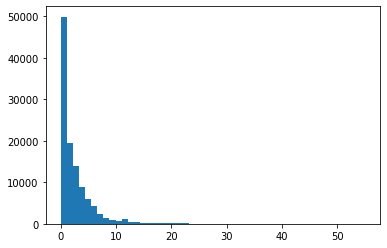

In [26]:
plt.hist(df.days_to_delivery, 50)

(array([5.364e+03, 4.390e+02, 5.540e+02, 5.810e+02, 6.100e+02, 2.922e+03,
        2.127e+03, 2.228e+03, 2.403e+03, 2.359e+03, 5.813e+03, 4.591e+03,
        4.371e+03, 4.286e+03, 4.209e+03, 8.792e+03, 6.605e+03, 8.338e+03,
        6.665e+03, 4.808e+03, 7.452e+03, 3.249e+03, 3.752e+03, 3.850e+03,
        2.684e+03, 3.790e+03, 1.370e+03, 1.179e+03, 1.285e+03, 1.089e+03,
        1.171e+03, 3.860e+02, 3.290e+02, 2.750e+02, 2.340e+02, 4.280e+02,
        1.260e+02, 1.130e+02, 7.600e+01, 6.700e+01, 1.280e+02, 5.900e+01,
        1.800e+01, 1.200e+01, 1.600e+01, 2.200e+01, 2.000e+00, 5.000e+00,
        0.000e+00, 5.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2,
        26.4, 27.6, 28.8, 30. , 31.2, 32.4, 33.6, 34.8, 36. , 37.2, 38.4,
        39.6, 40.8, 42. , 43.2, 44.4, 45.6, 46.8, 48. , 49.2, 50.4, 51.6,
        52.8, 54. , 55.2, 56.4, 57.6, 58.8, 60. ]),
 <a list of 50 Patch objects

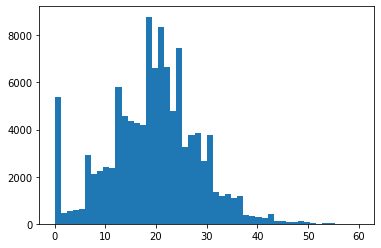

In [27]:
plt.hist(df.early_delivery, 50)

#Removendo colunas 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111237 entries, 0 to 112659
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   order_id                        111237 non-null  float64
 1   order_item_id                   111237 non-null  float64
 2   product_id                      111237 non-null  float64
 3   seller_id                       111237 non-null  float64
 4   price                           111237 non-null  float64
 5   freight_value                   111237 non-null  float64
 6   payment_sequential              111237 non-null  float64
 7   payment_type                    111237 non-null  float64
 8   payment_installments            111237 non-null  float64
 9   payment_value                   111237 non-null  float64
 10  review_id                       111237 non-null  float64
 11  review_score                    111237 non-null  float64
 12  review_comment_t

In [29]:
df = df.drop(['year_estimated_delivery','month_estimated_delivery','day_estimated_delivery','year_order_delivered_customerr','month_order_delivered_customer','day_order_delivered_customer','year_order_delivered_carrier','month_order_delivered_carrier','day_order_delivered_carrier','year_order_purchase_timestamp','month_order_purchase_timestamp','day_order_purchase_timestamp'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [31]:
df = df.drop(['year_review_answer','month_review_answer','day_review_answer','year_review_creation','month_review_creation','day_review_creation',], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [33]:
df = df.drop(['payment_sequential','review_id','review_score','review_comment_title','review_comment_message','order_status','customer_id','customer_zip_code_prefix','customer_city','customer_state','seller_zip_code_prefix','seller_city','seller_state','product_name_lenght','product_description_lenght','product_photos_qty'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111237 entries, 0 to 112659
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               111237 non-null  float64
 1   order_item_id          111237 non-null  float64
 2   product_id             111237 non-null  float64
 3   seller_id              111237 non-null  float64
 4   price                  111237 non-null  float64
 5   freight_value          111237 non-null  float64
 6   payment_type           111237 non-null  float64
 7   payment_installments   111237 non-null  float64
 8   payment_value          111237 non-null  float64
 9   customer_unique_id     111237 non-null  float64
 10  product_category_name  111237 non-null  float64
 11  product_weight_g       111237 non-null  float64
 12  product_length_cm      111237 non-null  float64
 13  product_height_cm      111237 non-null  float64
 14  product_width_cm       111237 non-nu

In [35]:
from google.colab import files
df.to_csv('olist_new_df.csv',index=False) 
files.download('olist_new_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>